# Importieren wichtiger Pakete

In [22]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
# für Visualisierung
import matplotlib.pyplot as plt
#plt.rcParams.keys()
plt.rcParams['ytick.labelsize'] = "large"
plt.rcParams['xtick.labelsize'] = "large"
plt.rcParams['axes.labelsize'] = "large"
plt.rcParams['figure.titlesize'] = "x-large"
import seaborn as sns


from sklearn.metrics import mean_squared_error
from math import sqrt

# Daten lesen und visualisieren

## load the data

In [23]:
# Eingabedateien haben keine Spaltennamen, hier die Namen der Spalte wird definiert
# Es enthält 26 Spalten: Motornummer, Zeitschritt, Drei betriebsbereite Sensoreinstellungen und 21 Sensormessungen.

# Motornummer, Zeitschritt
index_columns_names =  ["UnitNumber","Cycle"]
# 3 betriebsbereite Sensoreinstellungen
operational_settings_columns_names = ["Operation Setting "+str(i) for i in range(1,4)]
# 21 Sensormessungen
sensor_measure_columns_names =["Sensor Measure"+str(i) for i in range(1,22)]

input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

In [24]:
# Laden die Daten FD002
print("Laden der Daten beginnt!")
train_data = pd.read_csv('./data/train_FD002.txt', delim_whitespace=True, header=None)
train_data.columns = input_file_column_names
print("Laden der Daten ist fertig!")
print("Größe der Daten : Rows {}, Columns {}".format(train_data.shape[0], train_data.shape[1]))
train_data.head()

Laden der Daten beginnt!
Laden der Daten ist fertig!
Größe der Daten : Rows 53759, Columns 26


UnitNumber  Cycle  Operation Setting 1  Operation Setting 2  \
0           1      1              34.9983               0.8400   
1           1      2              41.9982               0.8408   
2           1      3              24.9988               0.6218   
3           1      4              42.0077               0.8416   
4           1      5              25.0005               0.6203   

   Operation Setting 3  Sensor Measure1  Sensor Measure2  Sensor Measure3  \
0                100.0           449.44           555.32          1358.61   
1                100.0           445.00           549.90          1353.22   
2                 60.0           462.54           537.31          1256.76   
3                100.0           445.00           549.51          1354.03   
4                 60.0           462.54           537.07          1257.71   

   Sensor Measure4  Sensor Measure5  Sensor Measure6  Sensor Measure7  \
0          1137.23             5.48             8.00           194.64   
1          1125.78             3.91             5.71           138.51   
2          1047.45             7.05             9.02           175.71   
3          1126.38             3.91             5.71           138.46   
4          1047.93             7.05             9.03           175.05   

   Sensor Measure8  Sensor Measure9  Sensor Measure10  Sensor Measure11  \
0          2222.65          8341.91              1.02             42.02   
1          2211.57          8303.96              1.02             42.20   
2          1915.11          8001.42              0.94             36.69   
3          2211.58          8303.96              1.02             41.96   
4          1915.10          7993.23              0.94             36.89   

   Sensor Measure12  Sensor Measure13  Sensor Measure14  Sensor Measure15  \
0            183.06           2387.72           8048.56            9.3461   
1            130.42           2387.66           8072.30            9.3774   
2            164.22           2028.03           7864.87           10.8941   
3            130.72           2387.61           8068.66            9.3528   
4            164.31           2028.00           7861.23           10.8963   

   Sensor Measure16  Sensor Measure17  Sensor Measure18  Sensor Measure19  \
0              0.02               334              2223            100.00   
1              0.02               330              2212            100.00   
2              0.02               309              1915             84.93   
3              0.02               329              2212            100.00   
4              0.02               309              1915             84.93   

   Sensor Measure20  Sensor Measure21  
0             14.73            8.8071  
1             10.41            6.2665  
2             14.08            8.6723  
3             10.59            6.4701  
4             14.13            8.5286

In [30]:
# Display summary statistics
print("\nSummary statistics:")
train_data.describe()


Summary statistics:


UnitNumber         Cycle  Operation Setting 1  Operation Setting 2  \
count  53759.000000  53759.000000         53759.000000         53759.000000   
mean     131.082981    109.154746            23.998407             0.572056   
std       74.463862     69.180569            14.747376             0.310016   
min        1.000000      1.000000             0.000000             0.000000   
25%       68.000000     52.000000            10.004600             0.250700   
50%      131.000000    104.000000            25.001300             0.700000   
75%      195.000000    157.000000            41.998000             0.840000   
max      260.000000    378.000000            42.008000             0.842000   

       Operation Setting 3  Sensor Measure1  Sensor Measure2  Sensor Measure3  \
count         53759.000000     53759.000000     53759.000000     53759.000000   
mean             94.046020       472.910207       579.672399      1419.971013   
std              14.237735        26.389707        37.289399       105.946341   
min              60.000000       445.000000       535.530000      1243.730000   
25%             100.000000       445.000000       549.570000      1352.760000   
50%             100.000000       462.540000       555.980000      1369.180000   
75%             100.000000       491.190000       607.340000      1499.370000   
max             100.000000       518.670000       644.520000      1612.880000   

       Sensor Measure4  Sensor Measure5  Sensor Measure6  Sensor Measure7  \
count     53759.000000     53759.000000     53759.000000     53759.000000   
mean       1205.442024         8.031986        11.600746       282.606787   
std         119.123428         3.613839         5.431802       146.005306   
min        1023.770000         3.910000         5.710000       136.800000   
25%        1123.655000         3.910000         5.720000       139.935000   
50%        1138.890000         7.050000         9.030000       194.660000   
75%        1306.850000        10.520000        15.490000       394.080000   
max        1439.230000        14.620000        21.610000       555.820000   

       Sensor Measure8  Sensor Measure9  Sensor Measure10  Sensor Measure11  \
count     53759.000000     53759.000000      53759.000000      53759.000000   
mean       2228.879188      8525.200837          1.094962         42.985172   
std         145.209816       335.812013          0.127469          3.232372   
min        1914.770000      7985.560000          0.930000         36.230000   
25%        2211.880000      8321.660000          1.020000         41.910000   
50%        2223.070000      8361.200000          1.020000         42.390000   
75%        2323.960000      8778.030000          1.260000         45.350000   
max        2388.390000      9215.660000          1.300000         48.510000   

       Sensor Measure12  Sensor Measure13  Sensor Measure14  Sensor Measure15  \
count      53759.000000      53759.000000      53759.000000      53759.000000   
mean         266.069034       2334.557253       8066.597682          9.329654   
std          137.659507        128.068271         84.837950          0.749335   
min          129.120000       2027.610000       7848.360000          8.335700   
25%          131.520000       2387.900000       8062.140000          8.677800   
50%          183.200000       2388.080000       8082.540000          9.310900   
75%          371.260000       2388.170000       8127.195000          9.386900   
max          523.370000       2390.480000       8268.500000         11.066900   

       Sensor Measure16  Sensor Measure17  Sensor Measure18  Sensor Measure19  \
count      53759.000000      53759.000000      53759.000000      53759.000000   
mean           0.023326        348.309511       2228.806358         97.756838   
std            0.004711         27.754515        145.327980          5.364067   
min            0.020000        303.000000       1915.000000         84.930000   
25%            0.020000   

    Die obige Tabelle zeigt nur die ersten fünf Zeilen der Training Datensatz. Die erste Spalte ist die Motornummer und die zweite Spalte die Anzahl der Zyklen. Aus der Abbildung ist ersichtlich, dass sich der Sensor Information und die Arbeitsbedingungen sich in verschiedenen Zyklen geändert haben.

In [26]:
# Check for missing values
print("\nMissing values:")
print(train_data.isnull().sum())


Missing values:
UnitNumber             0
Cycle                  0
Operation Setting 1    0
Operation Setting 2    0
Operation Setting 3    0
Sensor Measure1        0
Sensor Measure2        0
Sensor Measure3        0
Sensor Measure4        0
Sensor Measure5        0
Sensor Measure6        0
Sensor Measure7        0
Sensor Measure8        0
Sensor Measure9        0
Sensor Measure10       0
Sensor Measure11       0
Sensor Measure12       0
Sensor Measure13       0
Sensor Measure14       0
Sensor Measure15       0
Sensor Measure16       0
Sensor Measure17       0
Sensor Measure18       0
Sensor Measure19       0
Sensor Measure20       0
Sensor Measure21       0
dtype: int64


-> We don't have any missing values!

In [36]:
sensors = train_data.columns[5:]
sensors

Index(['Sensor Measure1', 'Sensor Measure2', 'Sensor Measure3',
       'Sensor Measure4', 'Sensor Measure5', 'Sensor Measure6',
       'Sensor Measure7', 'Sensor Measure8', 'Sensor Measure9',
       'Sensor Measure10', 'Sensor Measure11', 'Sensor Measure12',
       'Sensor Measure13', 'Sensor Measure14', 'Sensor Measure15',
       'Sensor Measure16', 'Sensor Measure17', 'Sensor Measure18',
       'Sensor Measure19', 'Sensor Measure20', 'Sensor Measure21'],
      dtype='object')

/var/folders/b5/_slh96n15tjbtbrh1564mz280000gn/T/ipykernel_78432/1456149534.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


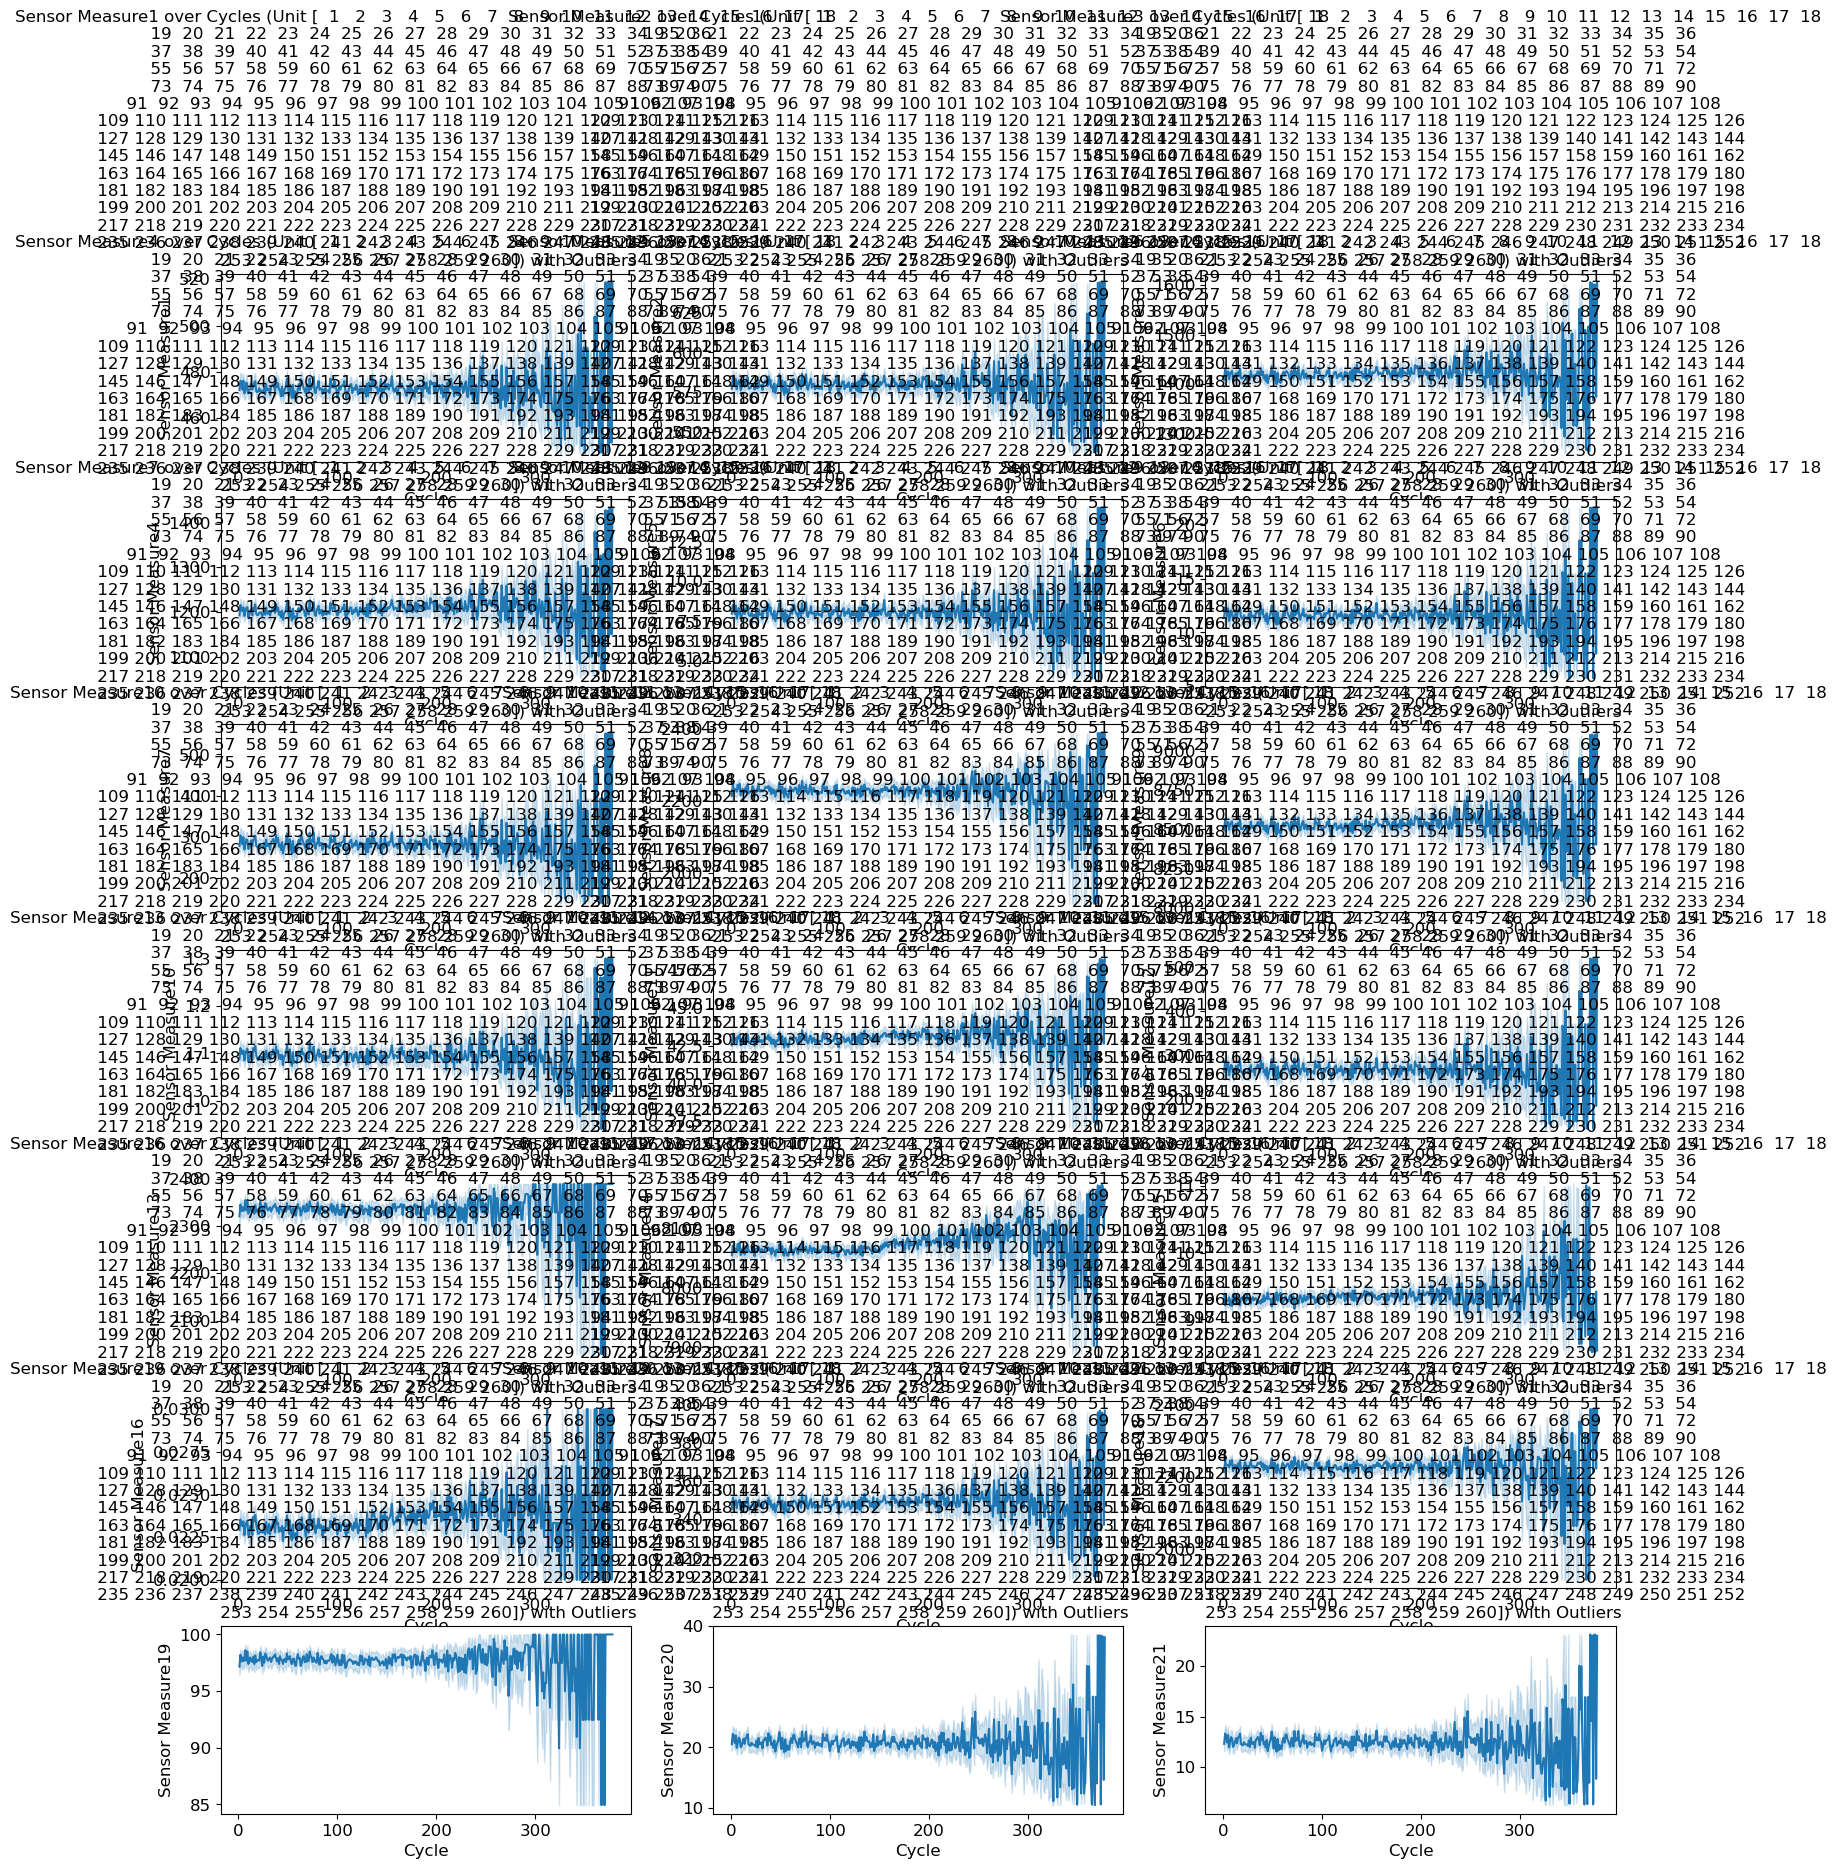

In [38]:
# Outlier detection using Z-score
from scipy.stats import zscore

outliers = {}
threshold = 3
for sensor in sensors:
    train_data['zscore'] = zscore(train_data[sensor])
    outliers[sensor] = train_data[train_data['zscore'].abs() > threshold]

# Plotting the outliers
fig, axes = plt.subplots(7, 3, figsize=(18, 20))
for i, sensor in enumerate(sensor_cols):
    sns.lineplot(x='Cycle', y=sensor, data=train_data, ax=axes[i//3, i%3])
    sns.scatterplot(x='Cycle', y=sensor, data=outliers[sensor], color='red', ax=axes[i//3, i%3], label='Outlier')
    axes[i//3, i%3].set_title(f'{sensor} over Cycles (Unit {unit}) with Outliers')
plt.tight_layout()
plt.show()


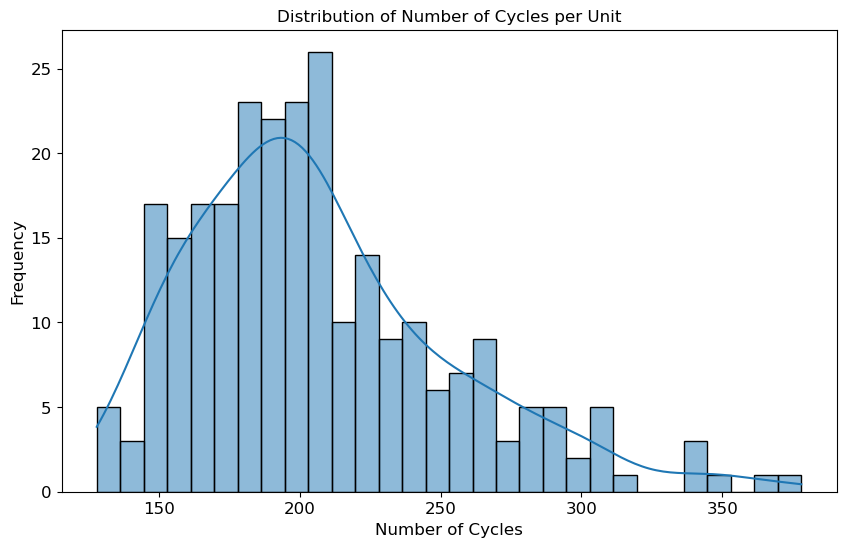

In [27]:
# Plotting the number of cycles per unit
plt.figure(figsize=(10, 6))
cycle_count = train_data.groupby('UnitNumber')['Cycle'].max()
sns.histplot(cycle_count, bins=30, kde=True)
plt.title('Distribution of Number of Cycles per Unit')
plt.xlabel('Number of Cycles')
plt.ylabel('Frequency')
plt.show()

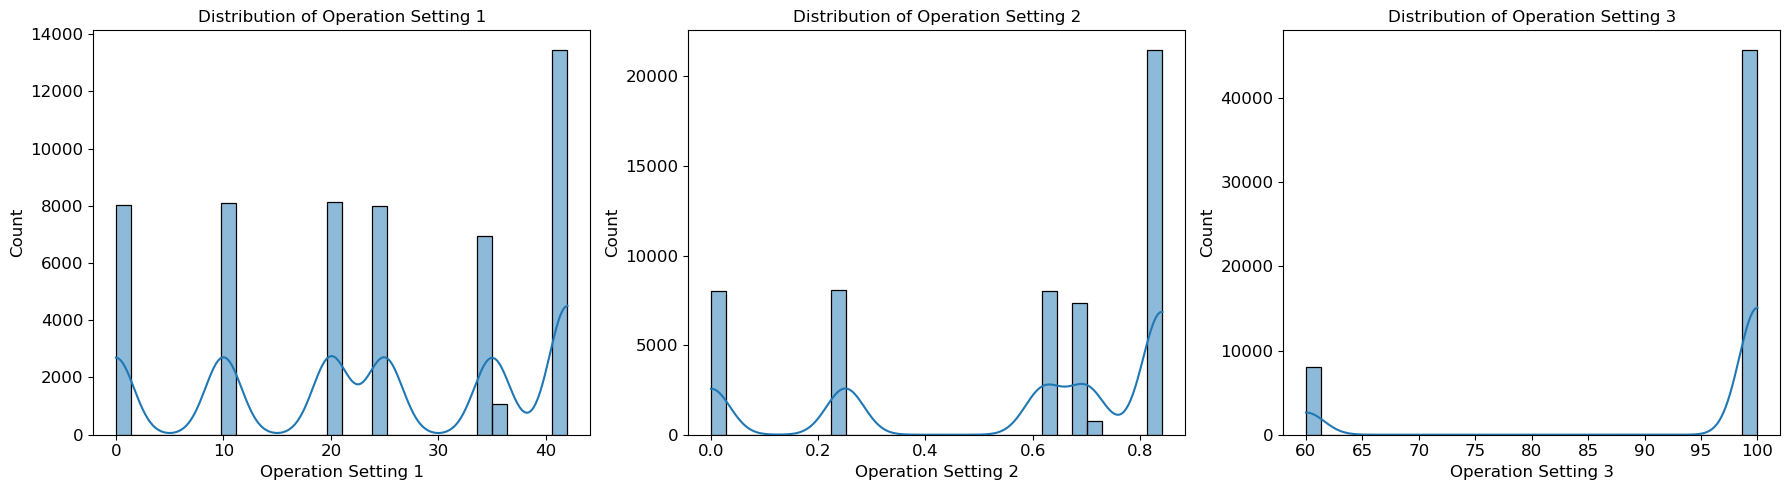

In [28]:
# Plotting the operation settings
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, setting in enumerate(['Operation Setting 1', 'Operation Setting 2', 'Operation Setting 3']):
    sns.histplot(train_data[setting], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {setting}')
plt.tight_layout()
plt.show()

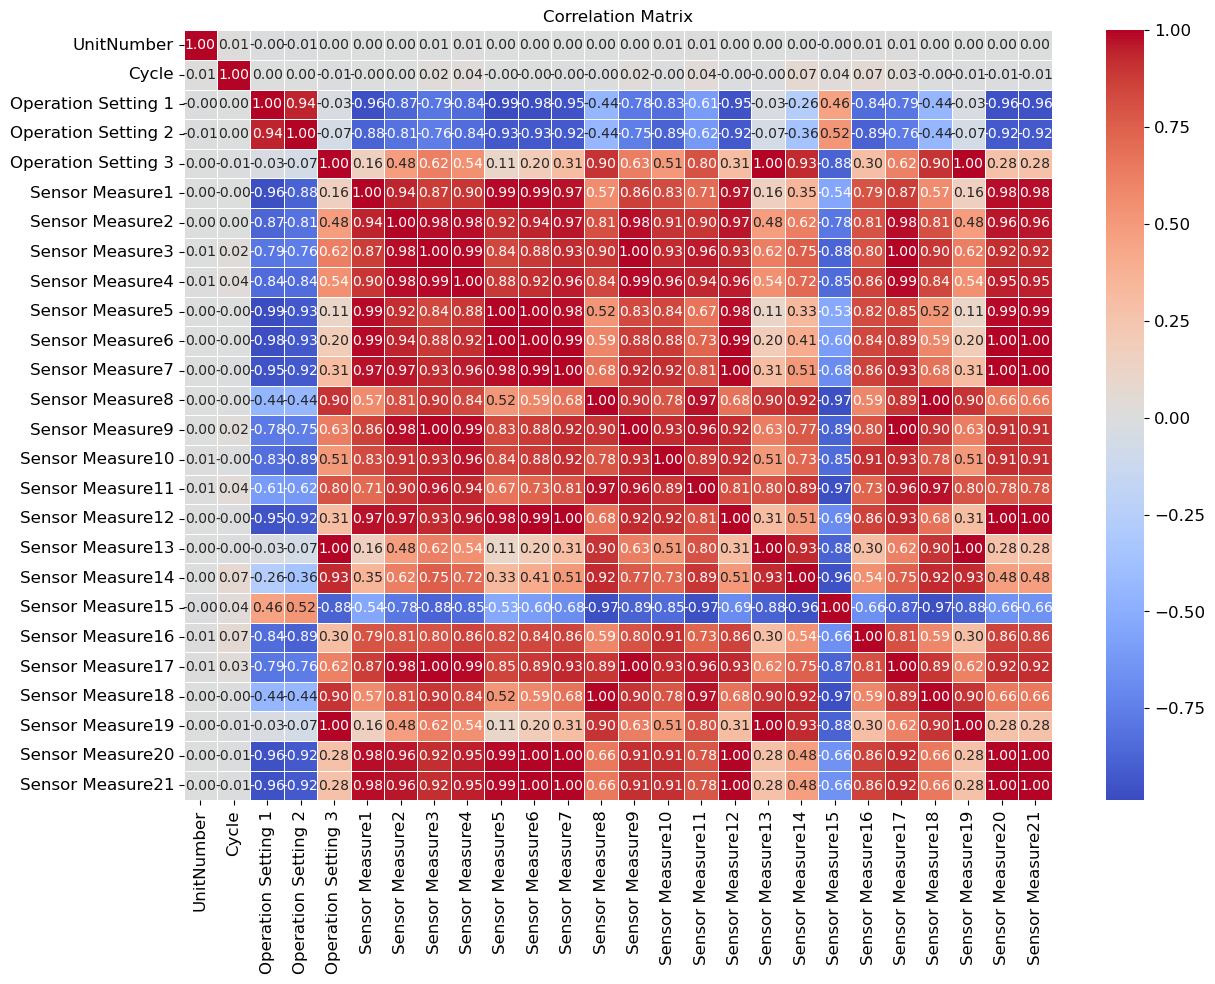

In [29]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [4]:
unit = train_data["UnitNumber"].unique()
print("In den Trainingsdaten sind {} Turbofan-Motor enthalten.".format(len(unit)))

In den Trainingsdaten sind 260 Turbofan-Motor enthalten.


**Unterschiedliche Maschinen haben unterschiedliche Lebenszyklen**

In [5]:
motor_id = 1
Dataframe_id = train_data[train_data["UnitNumber"]==motor_id]
print("Turbofan mit ID {} lief insgesamt {} Zyklen".format(motor_id, Dataframe_id.shape[0]))

Turbofan mit ID 1 lief insgesamt 149 Zyklen


In [6]:
motor_id = 2
Dataframe_id = train_data[train_data["UnitNumber"]==motor_id]
print("Turbofan mit ID {} lief insgesamt {} Zyklen".format(motor_id, Dataframe_id.shape[0]))

Turbofan mit ID 2 lief insgesamt 269 Zyklen


In [7]:
motor_id = 100
Dataframe_id = train_data[train_data["UnitNumber"]==motor_id]
Dataframe_id

UnitNumber  Cycle  Operation Setting 1  Operation Setting 2  \
19998         100      1               0.0024               0.0014   
19999         100      2              10.0022               0.2518   
20000         100      3               0.0001               0.0000   
20001         100      4               0.0017               0.0017   
20002         100      5               0.0023               0.0000   
...           ...    ...                  ...                  ...   
20205         100    208              41.9999               0.8418   
20206         100    209              42.0026               0.8416   
20207         100    210              35.0029               0.8400   
20208         100    211              35.0055               0.8400   
20209         100    212              42.0066               0.8410   

       Operation Setting 3  Sensor Measure1  Sensor Measure2  Sensor Measure3  \
19998                100.0           518.67           642.85          1593.43   
19999                100.0           489.05           604.91          1496.73   
20000                100.0           518.67           641.91          1592.44   
20001                100.0           518.67           642.11          1587.74   
20002                100.0           518.67           642.20          1586.80   
...                    ...              ...              ...              ...   
20205                100.0           445.00           550.59          1365.59   
20206                100.0           445.00           550.54          1365.38   
20207                100.0           449.44           556.85          1374.10   
20208                100.0           449.44           556.49          1380.26   
20209                100.0           445.00           550.39          1371.41   

       Sensor Measure4  Sensor Measure5  Sensor Measure6  Sensor Measure7  \
19998          1395.24            14.62            21.61           554.51   
19999          1301.57            10.52            15.49           394.88   
20000          1395.57            14.62            21.61           554.52   
20001          1405.77            14.62            21.61           554.61   
20002          1404.11            14.62            21.61           554.72   
...                ...              ...              ...              ...   
20205          1140.34             3.91             5.72           138.05   
20206          1136.76             3.91             5.72           138.96   
20207          1148.17             5.48             8.01           193.08   
20208          1151.67             5.48             8.00           194.05   
20209          1147.87             3.91             5.72           138.44   

       Sensor Measure8  Sensor Measure9  Sensor Measure10  Sensor Measure11  \
19998          2388.00          9066.26              1.30             47.25   
19999          2318.85          8796.82              1.26             45.33   
20000          2388.00          9068.66              1.30             47.22   
20001          2388.05          9077.14              1.30             47.33   
20002          2388.05          9063.60              1.30             47.20   
...                ...              ...               ...               ...   
20205          2212.23          8347.19              1.02             42.71   
20206          2212.18          8352.52              1.02             42.67   
20207          2223.36          8373.25              1.02             42.50   
20208          2223.28          8382.39              1.02             42.67   
20209          2212.14          8340.98              1.02             42.76   

       Sensor Measure12  Sensor Measure13  Sensor Measure14  Sensor Measure15  \
19998            522.13           2388.01           8146.28            8.3972   
19999            371.99           2388.07           8134.91            8.6337   
20000            522.28           2388.03           8153.37            8.423

**Die folgende Abbildung zeigt die Verteilung des Lebenszyklus von 260 Turbofan in den Trainingsdaten.**

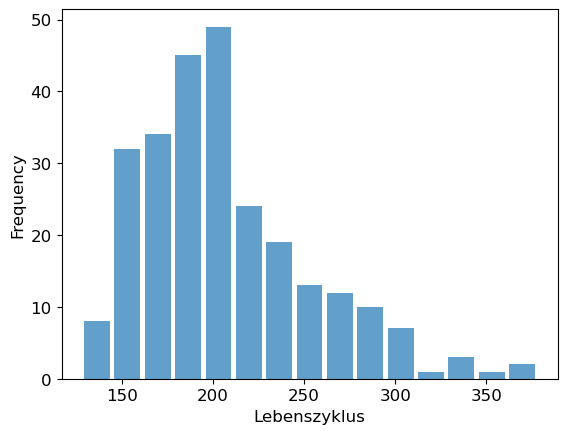

In [8]:
Zyklen_list = []
for ID in range(len(unit)):
    tmp = train_data[train_data["UnitNumber"]==ID+1]
    Zyklen_list.append(tmp.shape[0])
plt.hist(x=Zyklen_list, bins='auto',alpha=0.7, rwidth=0.85);
plt.xlabel('Lebenszyklus')
plt.ylabel('Frequency');

**Die folgende Abbildung zeigt die Zeitliche Verlauf von einem Turbofan. X Axis is the Cycle Number, Y Axis is the Sensor Value**

       Zeitliche Verlauf von Turbofan mit id 40. X Axis is the Cycle Number, Y Axis is the Sensor Value 


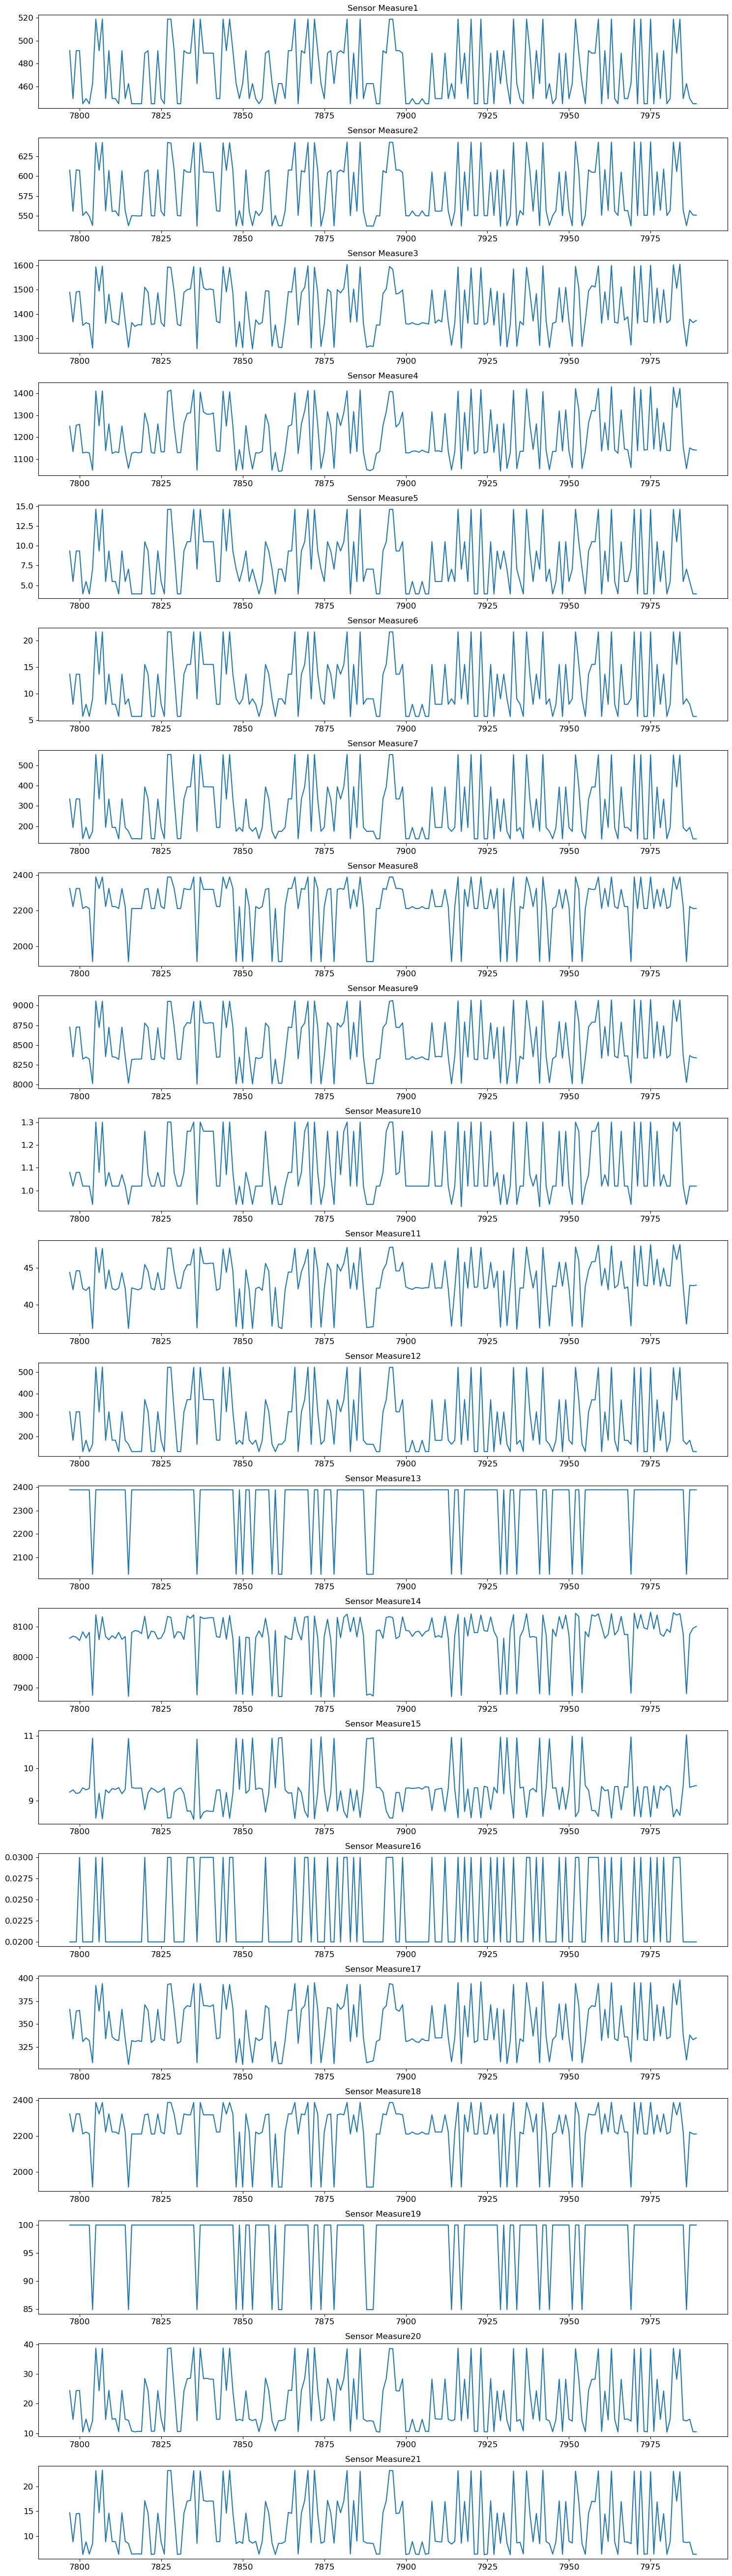

In [39]:
motor_id = 40
numberOfcolumns = len(sensor_measure_columns_names)
plt.figure(figsize=(15,2.5*len(sensor_measure_columns_names)))
Dataframe_id = train_data[train_data["UnitNumber"]==motor_id]
for i,v in enumerate(range(numberOfcolumns)):
    a = plt.subplot(numberOfcolumns,1,v+1)
    a.plot(Dataframe_id.index.values,Dataframe_id.iloc[:,v+5].values)
    a.title.set_text(sensor_measure_columns_names[v])
    plt.tight_layout()
print("       Zeitliche Verlauf von Turbofan mit id {}. X Axis is the Cycle Number, Y Axis is the Sensor Value ".format(motor_id))
plt.show()

    Der Trend der Sensorwert ist aus der obigen Abbildung deutlicher ersichtlich. Der Wert des Sensors beginnt sich ab einem bestimmten Moment zu ändern. Diese Änderungen hängen eng mit dem Zustand der Turbofan ab.

## RUL Berechnung
    Betreutes Lernen wird in der nächsten Analyse verwendet. Die Trainingsdaten enthalten jedoch keinen y-Wert (RUL). Hier lineare Degradationsmodell wird benutzt. Die Zeitschritt (Cycle) wird umgekehrt, wobei die verbleibende Zeit einer Maschine beim Ausfall 1 beträgt.

/var/folders/b5/_slh96n15tjbtbrh1564mz280000gn/T/ipykernel_14676/3569128994.py:4: FutureWarning: In a future version of pandas, returning a DataFrame in groupby.transform will align with the input's index. Apply `.to_numpy()` to the result in the transform function to keep the current behavior and silence this warning.
  train_data['rul'] = train_data[['UnitNumber', 'Cycle']].groupby('UnitNumber').transform(f1)


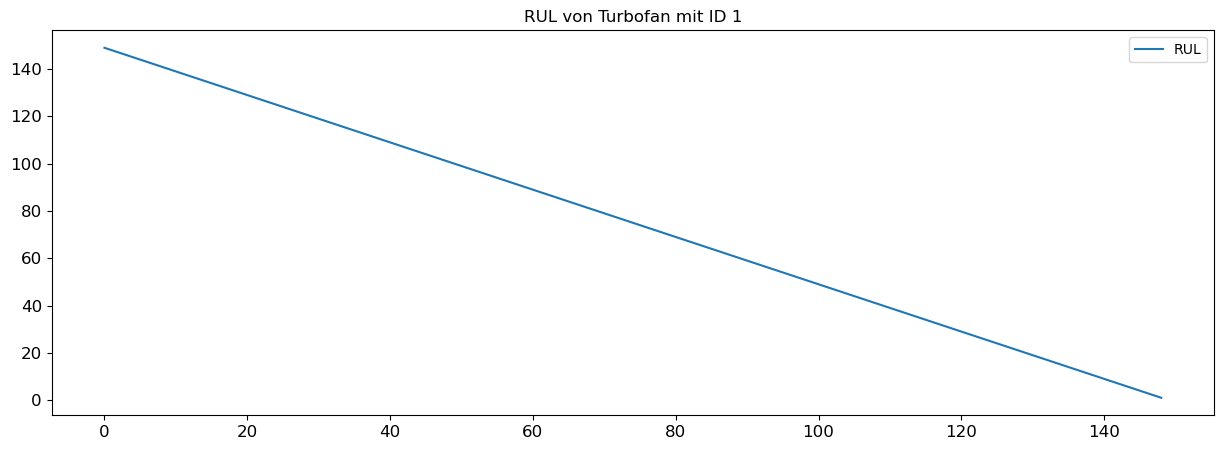

In [9]:

def f1(col):
    # Option 1: Reverse the time evolution, where remaining time of a machine is 1 at the failure.
    return col[::-1]  
train_data['rul'] = train_data[['UnitNumber', 'Cycle']].groupby('UnitNumber').transform(f1)
plt.figure(figsize=(15,5))
motor_id = 1
df_of_id = train_data[train_data["UnitNumber"]==motor_id]
plt.plot(df_of_id.rul, label="RUL")
#plt.plot(df_of_id.Cycle, label="Cycle")
plt.legend()
plt.title("RUL von Turbofan mit ID {}".format(motor_id))
plt.show()